In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm
from sklearn.manifold import TSNE


In [79]:
#Read the file

df = pd.read_csv('wine.csv')
#df.head()

In [80]:
#In this step we want to check if there is a difference in average for each feature based on color.

df.groupby(by = 'color').mean().drop(columns=['quality'])

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
color,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267


Some features here like fixed.acidity, volatille.acidity or total.sulfur.dioxide seem to show a directional difference between the kind of wines. We'll see how this goes later!

In [81]:
#same as previous but with quality

df.groupby(by = 'quality').mean()

C:\Users\dlr93\AppData\Local\Temp\ipykernel_32952\2066971289.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = 'quality').mean()


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


When looking at the quality, numbers seem less volatile but some features like volatile.acidity or chlorides could show some interesting properties.

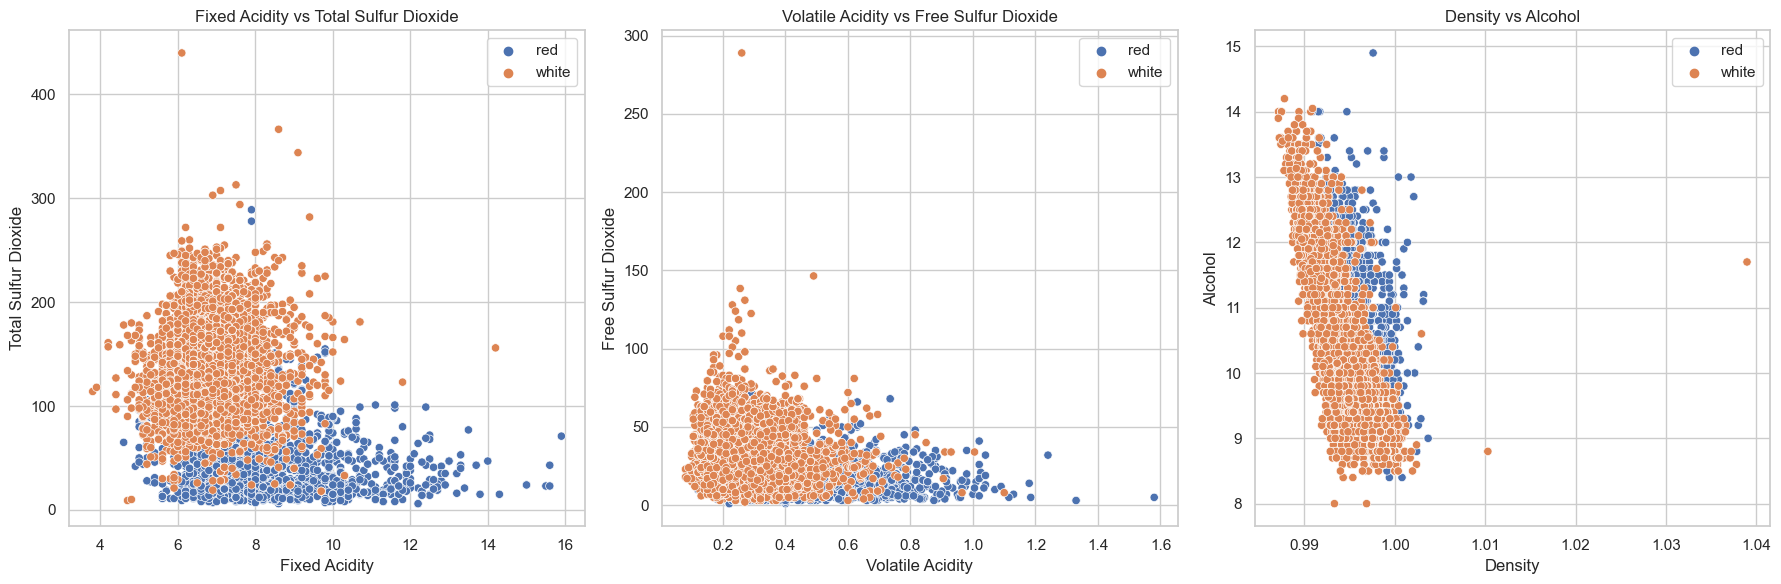

In [82]:
#Now let's plot a few variables by wine type

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x='fixed.acidity', y='total.sulfur.dioxide', hue='color', data=df, ax=axes[0])
axes[0].set_title("Fixed Acidity vs Total Sulfur Dioxide")
axes[0].set_xlabel("Fixed Acidity")
axes[0].set_ylabel("Total Sulfur Dioxide")
axes[0].legend()

sns.scatterplot(x='volatile.acidity', y='free.sulfur.dioxide', hue='color', data=df, ax=axes[1])
axes[1].set_title("Volatile Acidity vs Free Sulfur Dioxide")
axes[1].set_xlabel("Volatile Acidity")
axes[1].set_ylabel("Free Sulfur Dioxide")
axes[1].legend()

sns.scatterplot(x='density', y='alcohol', hue='color', data=df, ax=axes[2])
axes[2].set_title("Density vs Alcohol")
axes[2].set_xlabel("Density")
axes[2].set_ylabel("Alcohol")
axes[2].legend()

plt.tight_layout()
plt.show()



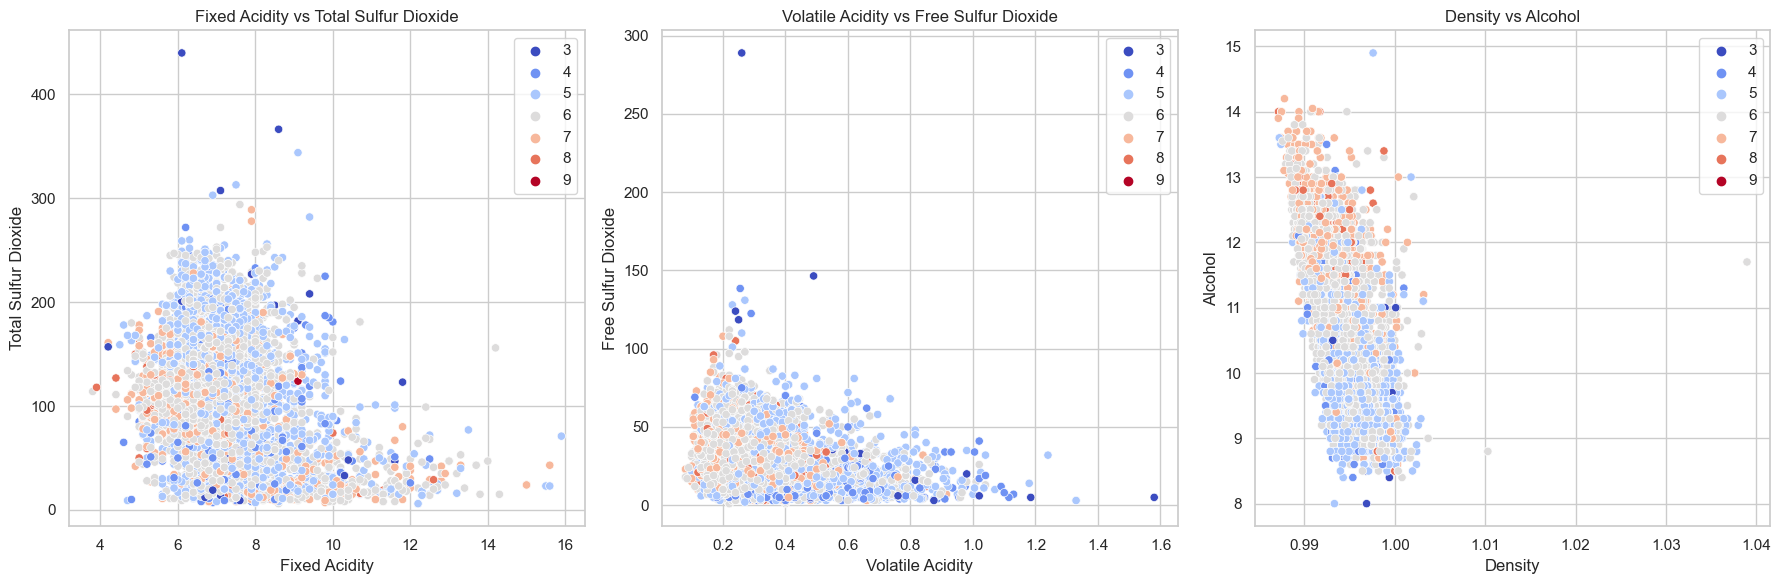

In [83]:
#Now let's plot a few variables by quality

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

custom_palette = sns.color_palette("coolwarm", as_cmap=True)

sns.scatterplot(x='fixed.acidity', y='total.sulfur.dioxide', hue='quality', palette=custom_palette, data=df, ax=axes[0])
axes[0].set_title("Fixed Acidity vs Total Sulfur Dioxide")
axes[0].set_xlabel("Fixed Acidity")
axes[0].set_ylabel("Total Sulfur Dioxide")
axes[0].legend()

sns.scatterplot(x='volatile.acidity', y='free.sulfur.dioxide', hue='quality', palette=custom_palette,data=df, ax=axes[1])
axes[1].set_title("Volatile Acidity vs Free Sulfur Dioxide")
axes[1].set_xlabel("Volatile Acidity")
axes[1].set_ylabel("Free Sulfur Dioxide")
axes[1].legend()

sns.scatterplot(x='density', y='alcohol', hue='quality',palette=custom_palette, data=df, ax=axes[2])
axes[2].set_title("Density vs Alcohol")
axes[2].set_xlabel("Density")
axes[2].set_ylabel("Alcohol")
axes[2].legend()

plt.tight_layout()
plt.show()

Until now we have seen that some features can be interesting to determine whether the wine is red or white. For defining the quality it could be trickier since some scores have very spread data. We will see how PCA performs here.

## PCA

In [84]:
#Remove the columns not needed for the PCA
df2 = df.drop(['quality', 'color'], axis=1)

In [85]:
#Now let's scale our data

scaler = StandardScaler()
 
scaler.fit(df2)
 
df_scaled = scaler.transform(df2)

dataframe_scaled = pd.DataFrame(data=df_scaled, 
                                columns=df2.columns)
 
dataframe_scaled.head()
 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


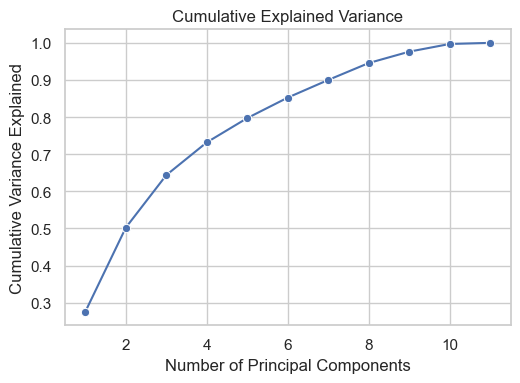

In [86]:
#First we will run the pca with all components to see how much variance is explained. 

pca = PCA(n_components=11)
 
pca.fit_transform(df_scaled)

prop_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(prop_var)
eigenvalues = pca.explained_variance_

PC_numbers = np.arange(pca.n_components_) + 1

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sns.lineplot(x=PC_numbers, y=cumulative_var, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()



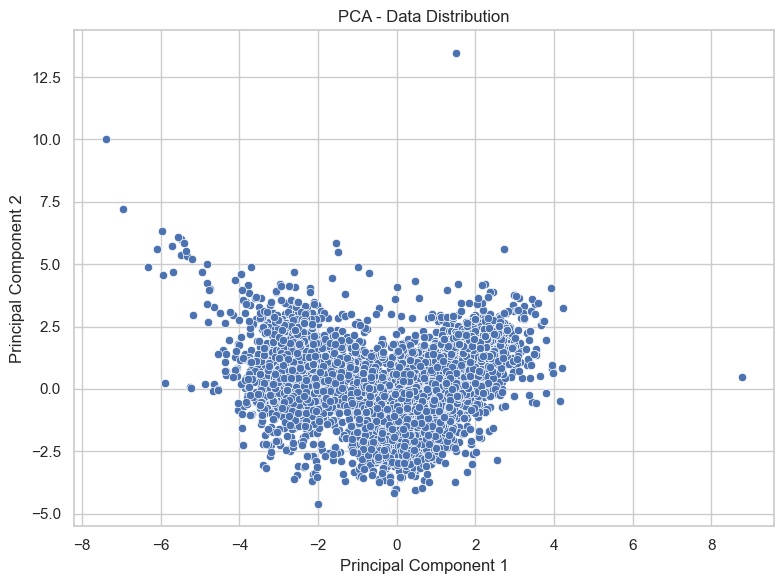

In [87]:
#Let's do PCA with 2 components since it will be easier to visualize and we keep 50% of the variance.

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataframe_scaled)

plt.figure(figsize=(8, 6))

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title("PCA - Data Distribution")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


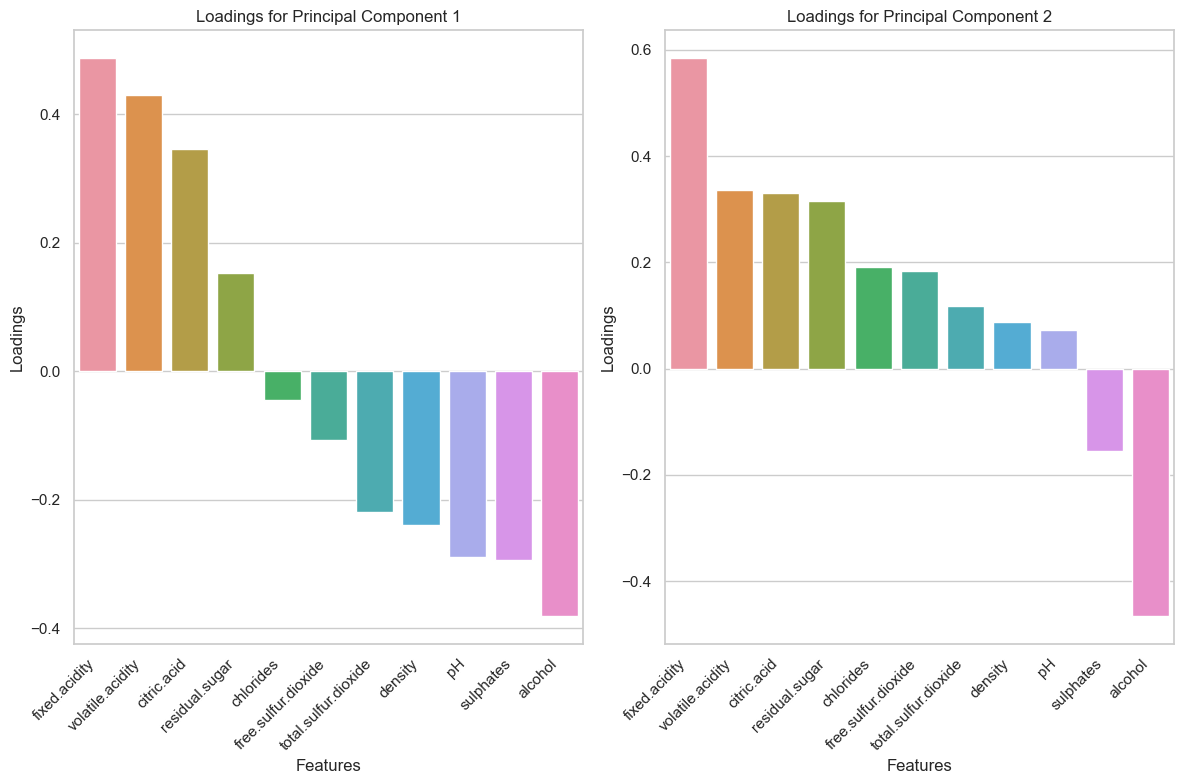

In [88]:
#We want to understand the loadings for each PCA to see if we can check any categorization.

loadings = pca.components_.T
sorted_loadings = np.argsort(loadings, axis=0)[::-1]

num_components = pca.n_components
num_rows = num_components // 2
num_cols = 2

x_labels = df2.columns.tolist()

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

for pc_idx, ax in enumerate(axes.flatten()):
    sorted_loading = loadings[sorted_loadings[:, pc_idx], pc_idx]
    sns.barplot(x=x_labels, y=sorted_loading, ax=ax)
    ax.set_title(f"Loadings for Principal Component {pc_idx + 1}")
    ax.set_xlabel("Features")
    ax.set_ylabel("Loadings")
    ax.set_xticklabels(x_labels, rotation=45, ha="right")

plt.tight_layout()
plt.show()



With this loadings by feature we can see that the acidity is playing a role to explain the variance! Seems that this could be helpful information to determine whether the wine is red or white. Taking a note from DrinkWellUK (https://drinkwelluk.com/blogs/news/which-wine-is-most-acidic): "In general, white wines are more acidic than red wines, with sweet white wines being the most acidic. The tartration level (meaning the % of the wine that is acid) of red wine is around 0.6 to 0 .8%, whilst in white wine this rises to between 0.7% and 0.9%."

In [89]:
#Let's apply Kmeans to PCA to see how the clusters align vs real data

kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(pca_result)
cluster_labels_2 = kmeans_2.labels_

C:\Users\dlr93\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


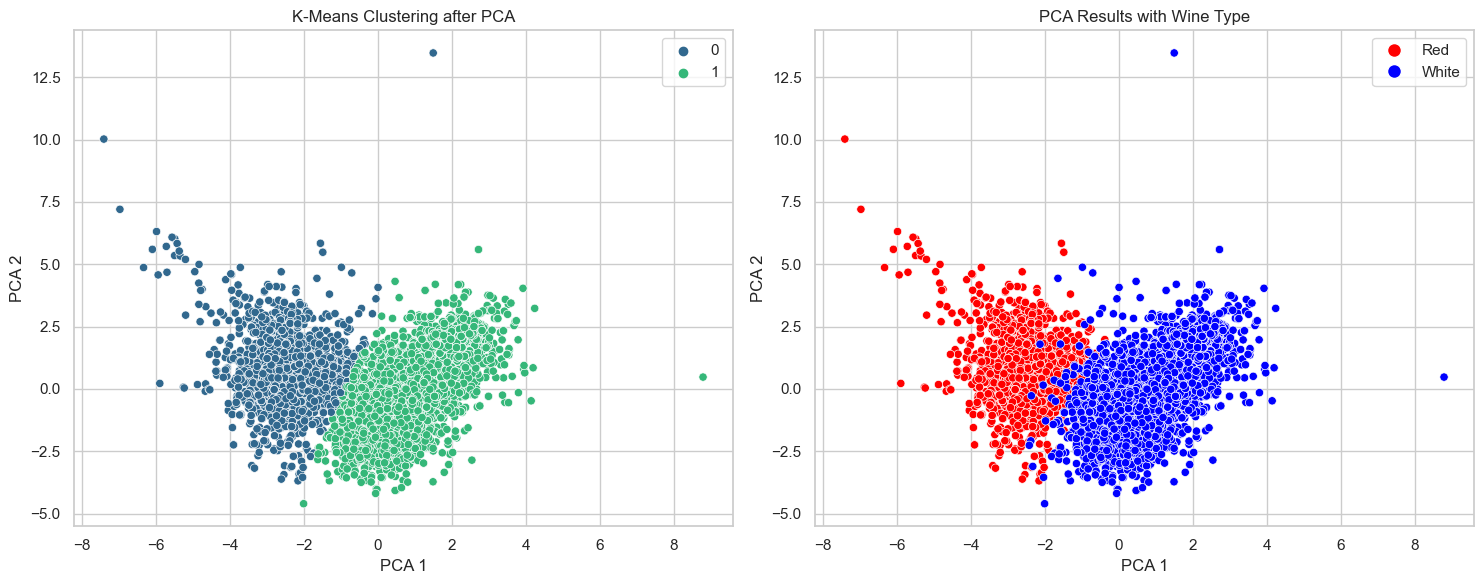

In [90]:
#Now we will be plotting the clustering for k means vs the real data
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels_2, palette="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clustering after PCA")
plt.legend()


colors = np.where(df["color"] == "red", 'red', 'blue')

plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=colors, palette={"red": "red", "blue": "blue"})
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Results with Wine Type")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Red'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='White')
])

plt.tight_layout()
plt.show()

This is interesting! After performing Kmeans to the PCA we can see that it does a really good prediction when trying to understand whether the wine is white or red based on the certain features provided previously.

In [91]:
#Let's apply Kmeans to PCA for 7 (quality colors)

kmeans_7 = KMeans(n_clusters=7, random_state=42)
kmeans_7.fit(pca_result)
cluster_labels_7 = kmeans_7.labels_

C:\Users\dlr93\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


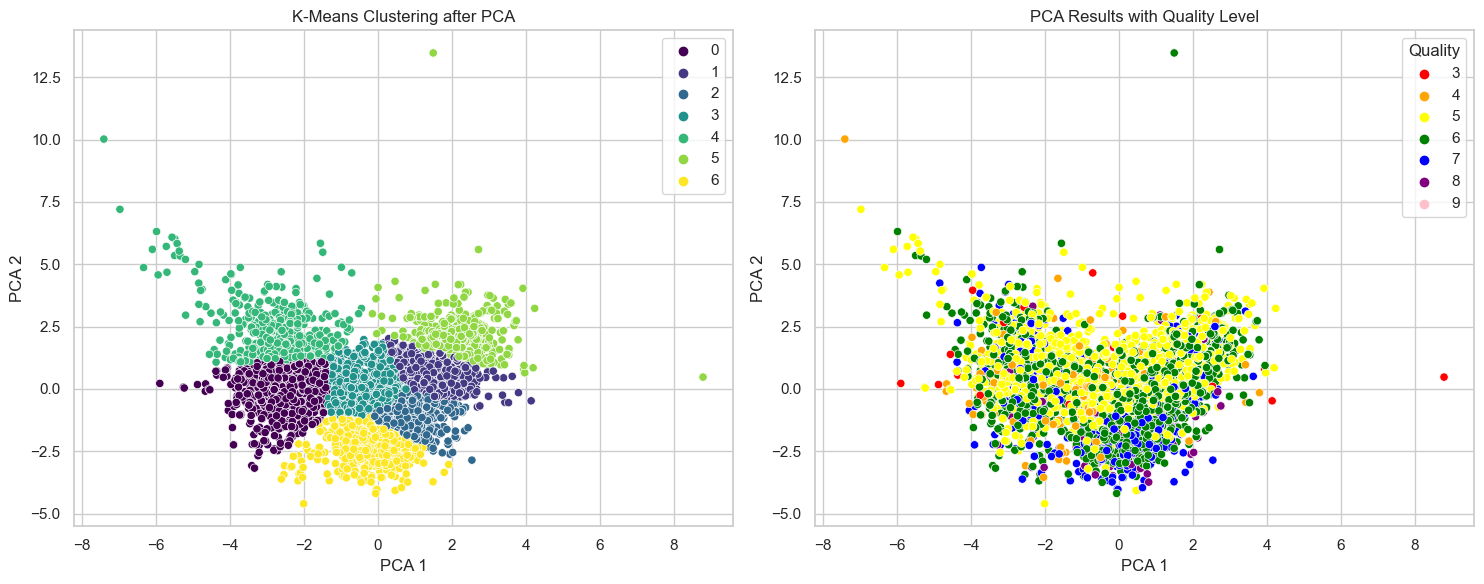

In [92]:
#Now let's plot the kmeans for 7 clusters vs the real PCA data
quality_colors = {
    3: 'red',
    4: 'orange',
    5: 'yellow',
    6: 'green',
    7: 'blue',
    8: 'purple',
    9: 'pink'
}

colors = df["quality"].apply(lambda x: quality_colors.get(x, 'gray'))

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels_7, palette="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clustering after PCA")
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df["quality"], palette=quality_colors)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Results with Quality Level")
plt.legend(title="Quality")

plt.tight_layout()
plt.show()


In this case we see that for wine quality PCA is having a harder time to identify the different numbers. Since it is all mixed up comparing PCA 1 vs PCA 2, when we perform Kmeans on the PCA data, it will just take the closest neighbor but not necessarily doing a correct classification.

**Final Conclusion**: the PCA approach here was really good to define whether the wine was white or red since we saw that factors like acidity or alcohol can define the wine type. However, when looking at the wine quality, it was tough to understand how the different factors played a role when defining its quality.